In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pydub import AudioSegment

# Load the meta data and add the gender information

In [2]:
# Load the CSV file
meta_df = pd.read_csv('data/meta.csv')
meta_df.head()

,file,speaker,label
0,0.wav,Christopher Hitchens,United Kingdom
1,1.wav,Ayn Rand,United States
2,2.wav,Donald Trump,United States
3,3.wav,Donald Trump,United States
4,4.wav,Alec Guinness,United Kingdom


In [3]:
# Get the unique speaker names
unique_speakers = meta_df['speaker'].unique()
print(unique_speakers)

['Christopher Hitchens' 'Ayn Rand' 'Donald Trump' 'Alec Guinness'
 'Calvin Coolidge' 'Barack Obama' '2Pac' 'JFK' 'Arnold Schwarzenegger'
 'Nick Offerman' 'Bill Clinton' 'Martin Luther King' 'Ronald Reagan'
 'Bernie Sanders' 'Mark Zuckerberg' 'Richard Nixon' 'Dave Chappelle'
 'Boris Johnson' 'Alan Watts' 'Jimmy Carter' 'Winston Churchill'
 'Dwight Eisenhower' 'Bill Burr' 'Alexandria Ocasio-Cortez'
 'Milton Friedman' 'FDR' 'Louis Farrakhan' 'Norm MacDonald'
 'Queen Elizabeth II' 'Gilbert Gottfried' 'George Carlin' 'Nelson Mandela'
 'Robert Kardashian' 'John Cleese' 'Malcolm X' 'Tucker Carlson'
 'Adam Driver' 'Lyndon Johnson' 'Mr. Rogers' 'Billie Eilish'
 'Jeff Goldblum' 'Kamala Harris' 'Bob Ross' 'Harry Truman' 'Orson Welles'
 'Scarlett Johansson' 'Louis C.K.' 'Kanye West' 'George W. Bush'
 'Frank Sinatra' 'Jerry Seinfeld' 'Mitch Hedberg' 'The Notorious B.I.G.'
 'William F. Buckley']


In [4]:
gender_mapping = {
    'Christopher Hitchens': 'Male',
    'Ayn Rand': 'Female',
    'Donald Trump': 'Male',
    'Alec Guinness': 'Male',
    'Calvin Coolidge': 'Male',
    'Barack Obama': 'Male',
    '2Pac': 'Male',
    'JFK': 'Male',
    'Arnold Schwarzenegger': 'Male',
    'Nick Offerman': 'Male',
    'Bill Clinton': 'Male',
    'Martin Luther King': 'Male',
    'Ronald Reagan': 'Male',
    'Bernie Sanders': 'Male',
    'Mark Zuckerberg': 'Male',
    'Richard Nixon': 'Male',
    'Dave Chappelle': 'Male',
    'Boris Johnson': 'Male',
    'Alan Watts': 'Male',
    'Jimmy Carter': 'Male',
    'Winston Churchill': 'Male',
    'Dwight Eisenhower': 'Male',
    'Bill Burr': 'Male',
    'Alexandria Ocasio-Cortez': 'Female',
    'Milton Friedman': 'Male',
    'FDR': 'Male',
    'Louis Farrakhan': 'Male',
    'Norm MacDonald': 'Male',
    'Queen Elizabeth II': 'Female',
    'Gilbert Gottfried': 'Male',
    'George Carlin': 'Male',
    'Nelson Mandela': 'Male',
    'Robert Kardashian': 'Male',
    'John Cleese': 'Male',
    'Malcolm X': 'Male',
    'Tucker Carlson': 'Male',
    'Adam Driver': 'Male',
    'Lyndon Johnson': 'Male',
    'Mr. Rogers': 'Male',
    'Billie Eilish': 'Female',
    'Jeff Goldblum': 'Male',
    'Kamala Harris': 'Female',
    'Bob Ross': 'Male',
    'Harry Truman': 'Male',
    'Orson Welles': 'Male',
    'Scarlett Johansson': 'Female',
    'Louis C.K.': 'Male',
    'Kanye West': 'Male',
    'George W. Bush': 'Male',
    'Frank Sinatra': 'Male',
    'Jerry Seinfeld': 'Male',
    'Mitch Hedberg': 'Male',
    'The Notorious B.I.G.': 'Male',
    'William F. Buckley': 'Male'
}

meta_df['gender'] = meta_df['speaker'].map(gender_mapping)

In [5]:
missing_values = meta_df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
file       0
speaker    0
label      0
gender     0
dtype: int64


# Prepare gender distribution

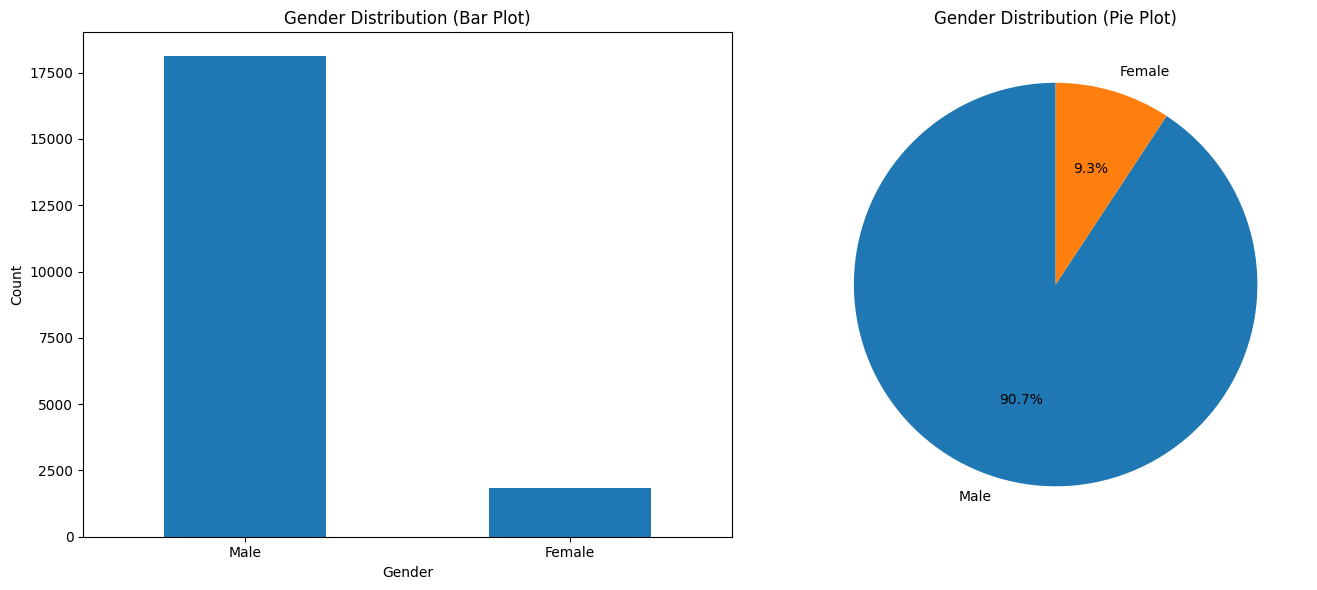

gender
Male      18114
Female     1849
Name: count, dtype: int64

In [12]:
# Calculate gender distribution
gender_distribution = meta_df['gender'].value_counts()

# Plot gender distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot
gender_distribution.plot(kind='bar', ax=axes[0])
axes[0].set_title('Gender Distribution (Bar Plot)')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_xticks(range(len(gender_distribution.index)))
axes[0].set_xticklabels(gender_distribution.index, rotation=0)

# Pie plot
gender_distribution.plot(kind='pie', autopct='%1.1f%%', ax=axes[1], startangle=90)
axes[1].set_title('Gender Distribution (Pie Plot)')
axes[1].set_ylabel('')  # Remove y-label for pie plot

# Adjust layout
plt.tight_layout()

# Save the plot
plot_path = 'plots/gender_number_of_audio_recordings_distribution.png'
plt.savefig(plot_path)

plt.show()

# Display the distribution as a table
gender_distribution

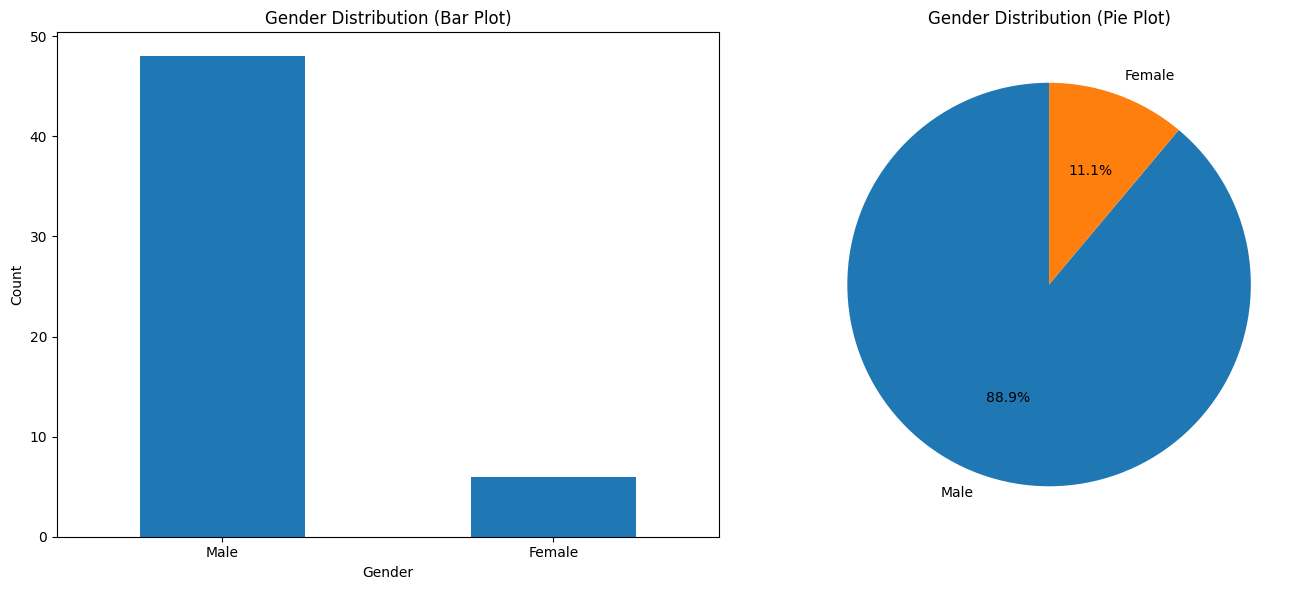

Gender Distribution for Unique Speakers:
gender
Male      48
Female     6
Name: count, dtype: int64


In [11]:
# Filter for unique speakers
unique_speakers_df = meta_df.drop_duplicates(subset=['speaker'])

# Calculate gender distribution
gender_distribution = unique_speakers_df['gender'].value_counts()

# Plot gender distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot
gender_distribution.plot(kind='bar', ax=axes[0])
axes[0].set_title('Gender Distribution (Bar Plot)')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_xticks(range(len(gender_distribution.index)))
axes[0].set_xticklabels(gender_distribution.index, rotation=0)

# Pie plot
gender_distribution.plot(kind='pie', autopct='%1.1f%%', ax=axes[1], startangle=90)
axes[1].set_title('Gender Distribution (Pie Plot)')
axes[1].set_ylabel('')  # Remove y-label for pie plot

# Adjust layout
plt.tight_layout()

# Save the plot
plot_path = 'plots/gender_distribution.png'
plt.savefig(plot_path)

# Show the plot
plt.show()

# Display the gender distribution table
print("Gender Distribution for Unique Speakers:")
print(gender_distribution)

# Prepare country distribution


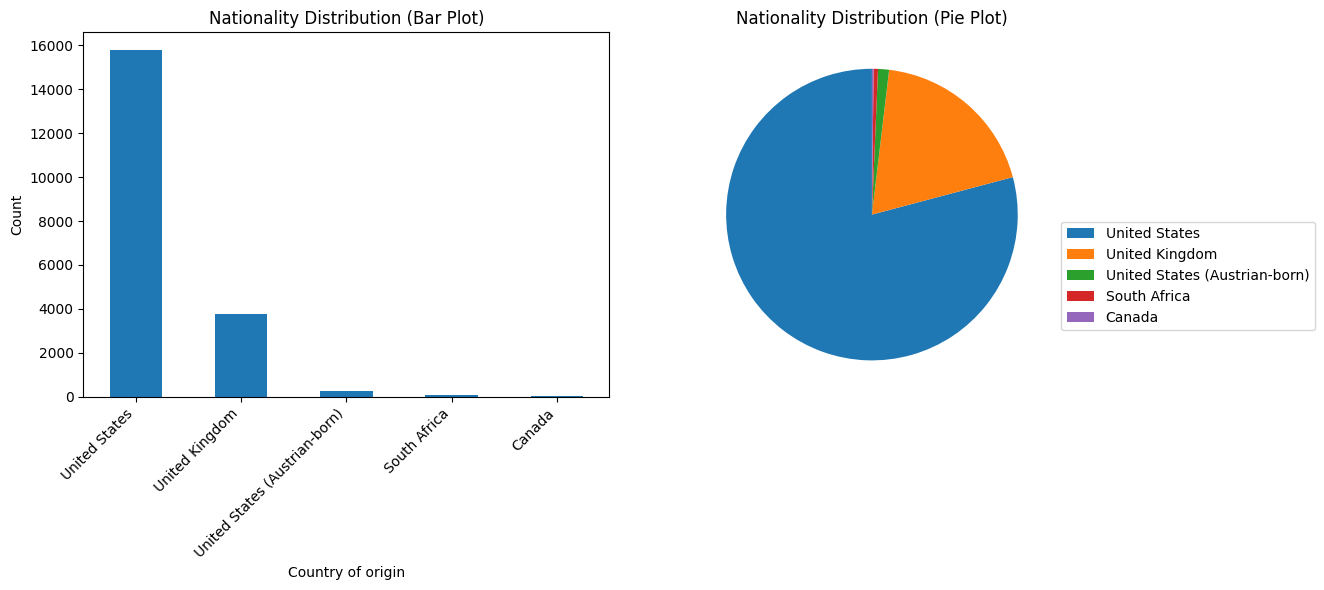

label
United States                    15798
United Kingdom                    3789
United States (Austrian-born)      243
South Africa                        97
Canada                              36
Name: count, dtype: int64

In [28]:
# Calculate gender distribution
country_distribution = meta_df['label'].value_counts()

# Plot gender distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot
country_distribution.plot(kind='bar', ax=axes[0])
axes[0].set_title('Nationality Distribution (Bar Plot)')
axes[0].set_xlabel('Country of origin')
axes[0].set_ylabel('Count')
axes[0].set_xticks(range(len(country_distribution.index)))
axes[0].set_xticklabels(country_distribution.index, rotation=45, ha='right')

# Pie plot
country_distribution.plot(kind='pie', ax=axes[1], startangle=90, legend=True, labels=None)
axes[1].set_title('Nationality Distribution (Pie Plot)')
axes[1].set_ylabel('')
axes[1].legend(
    labels=country_distribution.index, 
    loc='upper left', 
    bbox_to_anchor=(1.0, 0.5)  # Position the legend outside the chart
)

# Adjust layout
plt.tight_layout()

# Save the plot
plot_path = 'plots/nationality_number_of_audio_recordings_distribution.png'
plt.savefig(plot_path)

plt.show()

# Display the distribution as a table
country_distribution

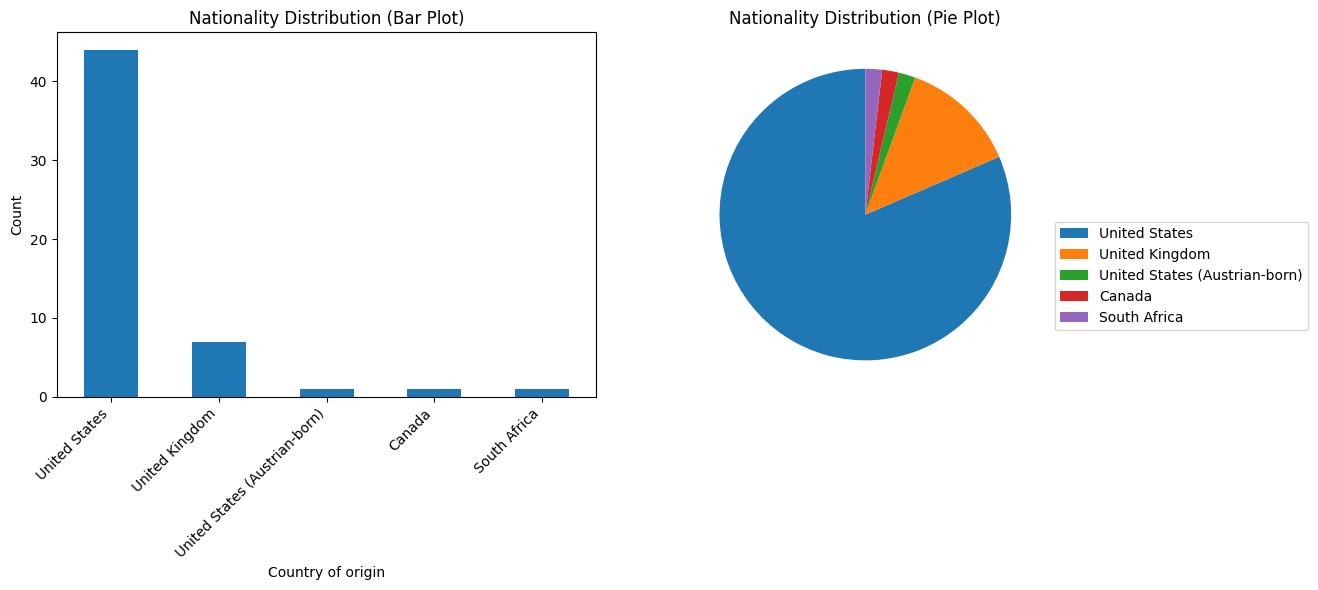

label
United States                    44
United Kingdom                    7
United States (Austrian-born)     1
Canada                            1
South Africa                      1
Name: count, dtype: int64

In [27]:
# Filter for unique speakers
unique_speakers_df = meta_df.drop_duplicates(subset=['speaker'])

# Calculate gender distribution
country_distribution = unique_speakers_df['label'].value_counts()

# Plot gender distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot
country_distribution.plot(kind='bar', ax=axes[0])
axes[0].set_title('Nationality Distribution (Bar Plot)')
axes[0].set_xlabel('Country of origin')
axes[0].set_ylabel('Count')
axes[0].set_xticks(range(len(country_distribution.index)))
axes[0].set_xticklabels(country_distribution.index, rotation=45, ha='right')

# Pie plot
country_distribution.plot(kind='pie', ax=axes[1], startangle=90, legend=True, labels=None)
axes[1].set_title('Nationality Distribution (Pie Plot)')
axes[1].set_ylabel('')
axes[1].legend(
    labels=country_distribution.index, 
    loc='upper left', 
    bbox_to_anchor=(1.0, 0.5)  # Position the legend outside the chart
)

# Adjust layout
plt.tight_layout()

# Save the plot
plot_path = 'plots/nationality_distribution.png'
plt.savefig(plot_path)

plt.show()

# Display the distribution as a table
country_distribution

# Calculate the duration of the audio recordings per celebrity

In [31]:
# Load metadata
meta_df = pd.read_csv('data/meta.csv')

# Initialize a dictionary to store total durations
total_durations = {}

# Directory containing the audio files
audio_dir = 'data'

# Iterate over rows in the metadata
for _, row in meta_df.iterrows():
    file_path = os.path.join(audio_dir, row['file'])  # Full path to the audio file
    speaker = row['speaker']  # Get the celebrity's name

    try:
        # Load the audio file and get its duration in seconds
        audio = AudioSegment.from_file(file_path)
        duration = len(audio) / 1000.0  # Convert milliseconds to seconds
        
        # Add the duration to the celebrity's total
        if speaker not in total_durations:
            total_durations[speaker] = 0
        total_durations[speaker] += duration
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Convert the results to a DataFrame for analysis
duration_df = pd.DataFrame(list(total_durations.items()), columns=['Celebrity', 'Total Duration (s)'])
duration_df = duration_df.sort_values(by='Total Duration (s)', ascending=False)

In [32]:
duration_df.head()

,Celebrity,Total Duration (s)
5,Barack Obama,13285.828
2,Donald Trump,11723.674
13,Bernie Sanders,6476.370
3,Alec Guinness,5719.857
1,Ayn Rand,5097.461


In [33]:
duration_df.to_csv('celebrity_durations.csv', index=False)

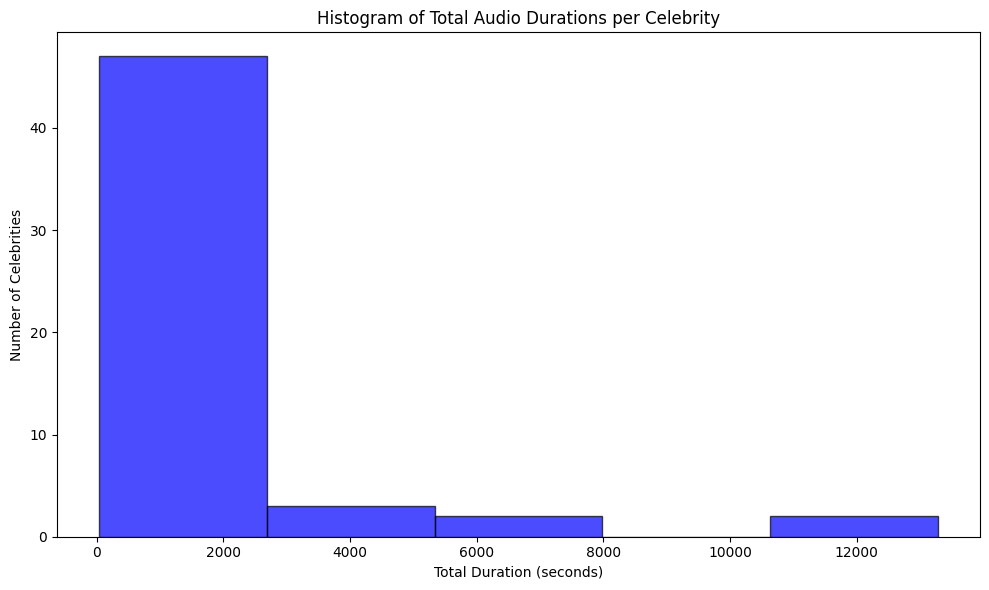

In [38]:
# Histogram of durations
plt.figure(figsize=(10, 6))
plt.hist(duration_df['Total Duration (s)'], bins=5, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Total Audio Durations per Celebrity')
plt.xlabel('Total Duration (seconds)')
plt.ylabel('Number of Celebrities')
plt.tight_layout()

plot_path = 'plots/histogram_audio_duration.png'
plt.savefig(plot_path)

plt.show()

In [40]:
# Extract 5 celebrities with the highest and lowest durations
top_5 = duration_df.nlargest(5, 'Total Duration (s)')
bottom_5 = duration_df.nsmallest(5, 'Total Duration (s)')

print("Top 5 Celebrities by Total Duration:", top_5, sep='\n')
print("\nBottom 5 Celebrities by Total Duration:", bottom_5, sep='\n')

Top 5 Celebrities by Total Duration:
         Celebrity  Total Duration (s)
5     Barack Obama           13285.828
2     Donald Trump           11723.674
13  Bernie Sanders            6476.370
3    Alec Guinness            5719.857
1         Ayn Rand            5097.461

Bottom 5 Celebrities by Total Duration:
             Celebrity  Total Duration (s)
51       Mitch Hedberg              33.000
53  William F. Buckley              35.422
19        Jimmy Carter              63.666
50      Jerry Seinfeld              65.905
46          Louis C.K.              66.279


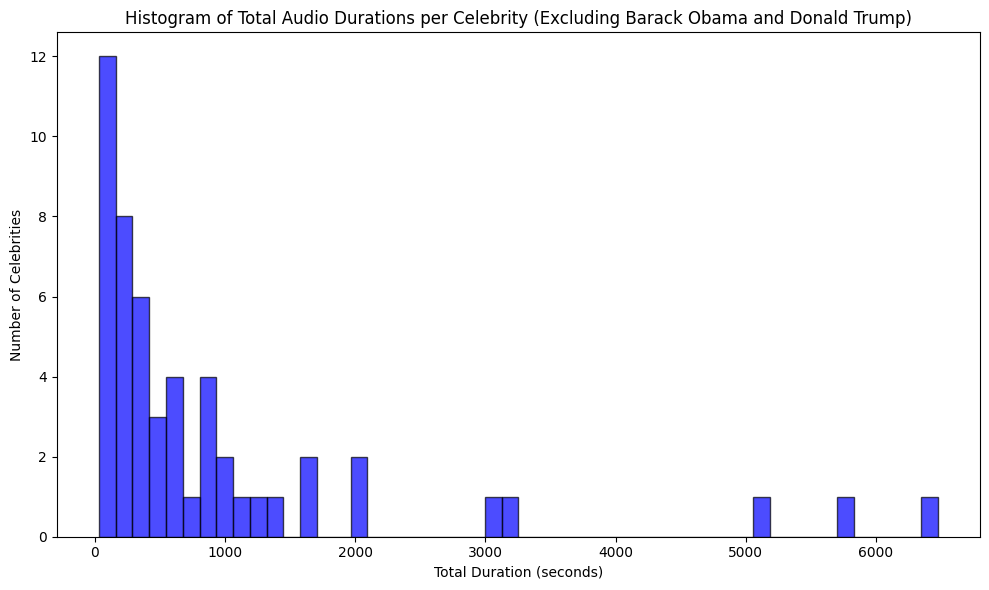

In [45]:
# Filter out the specified celebrities
filtered_duration_df = duration_df[~duration_df['Celebrity'].isin(['Barack Obama', 'Donald Trump'])]

# Histogram of durations (excluding specific celebrities)
plt.figure(figsize=(10, 6))
plt.hist(filtered_duration_df['Total Duration (s)'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Total Audio Durations per Celebrity (Excluding Barack Obama and Donald Trump)')
plt.xlabel('Total Duration (seconds)')
plt.ylabel('Number of Celebrities')
plt.tight_layout()

# Save the plot
plot_path = 'plots/histogram_audio_duration_filtered.png'
plt.savefig(plot_path)

plt.show()